# NBA - Stats and Linear Regression

In [256]:
from sklearn import datasets, model_selection, svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import threading
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

## Read training dataset

In [257]:
filename=r'NbaStats.csv'
data_train=pd.read_csv(filename,index_col=None,na_values='?',sep = ';')
data_train=data_train.dropna()

#print("\nDESCRIBE DATA:\n",data_train.describe())
data_train.describe().to_excel(r'original_Describe.xlsx')
data_train.describe()

stdW=data_train['Wins'].std()
meanW=data_train['Wins'].mean()
meanW

41.0

## Read testing dataset

In [258]:
filename2=r'NbaPredict.csv'
data_test=pd.read_csv(filename2,index_col=None,na_values='?',sep = ',')
data_test=data_test.dropna()

#print("\nDESCRIBE DATA:\n",data_test.describe())
#data_test.describe().to_excel(r'original_Describe_pre.xlsx')
data_test.describe()

,Game Played,Wins,Losses,WIN %,Minutes Played,Points,Field Goals Made,Field Goals Attempted,Field Goal %,3 Point Field Goals Made,...,Defensive Rebounds,Rebounds,Assists,Turnovers,Steals,Blocks,Blocked Field Goal Attempts,Personal Fouls,Personal Fouls Drawn,Plus minus
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,82.0,41.000000,41.000000,0.499967,48.320000,111.203333,41.073333,89.213333,46.046667,11.36000,...,34.823333,45.170000,24.580000,14.076667,7.623333,4.946667,4.953333,20.903333,20.893333,0.013333
std,0.0,12.028701,12.028701,0.146707,0.158441,4.093180,1.672069,2.110194,1.323458,1.50919,...,1.805296,2.110916,2.086971,1.024084,0.840231,0.730013,0.612926,1.341508,1.268976,4.887615
min,82.0,17.000000,22.000000,0.207000,48.100000,103.500000,38.000000,84.400000,43.300000,9.10000,...,31.300000,40.400000,20.100000,12.100000,6.100000,2.400000,3.600000,18.100000,18.700000,-9.600000
25%,82.0,33.000000,32.250000,0.402000,48.200000,107.625000,39.875000,87.675000,45.000000,10.15000,...,33.750000,43.975000,23.400000,13.425000,6.825000,4.625000,4.525000,20.150000,20.025000,-1.650000
50%,82.0,41.500000,40.500000,0.506000,48.300000,112.000000,41.350000,89.100000,46.150000,11.30000,...,34.900000,45.350000,24.550000,14.000000,7.550000,5.050000,5.050000,20.900000,20.750000,-0.150000
75%,82.0,49.750000,49.000000,0.607000,48.400000,114.350000,42.275000,90.500000,47.075000,12.32500,...,35.750000,46.400000,26.000000,14.650000,8.300000,5.375000,5.375000,21.475000,21.775000,3.850000
max,82.0,60.000000,65.000000,0.732000,48.700000,118.100000,44.000000,94.000000,49.100000,16.10000,...,40.400000,49.700000,29.400000,17.000000,9.300000,6.400000,6.100000,23.600000,24.000000,8.900000


## Print correlation graphs & Scatter

C:\Users\Yooru\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Yooru\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Yooru\Anaconda3\lib\site-packages\yellowbrick\features\rankd.py:216: YellowbrickWarning: RankD plots may be clipped when using matplotlib v3.1.1, upgrade to matplotlib v3.1.2 or later to fix the plots.
  warnings.warn(msg, YellowbrickWarning)
C:\Users\Yooru\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


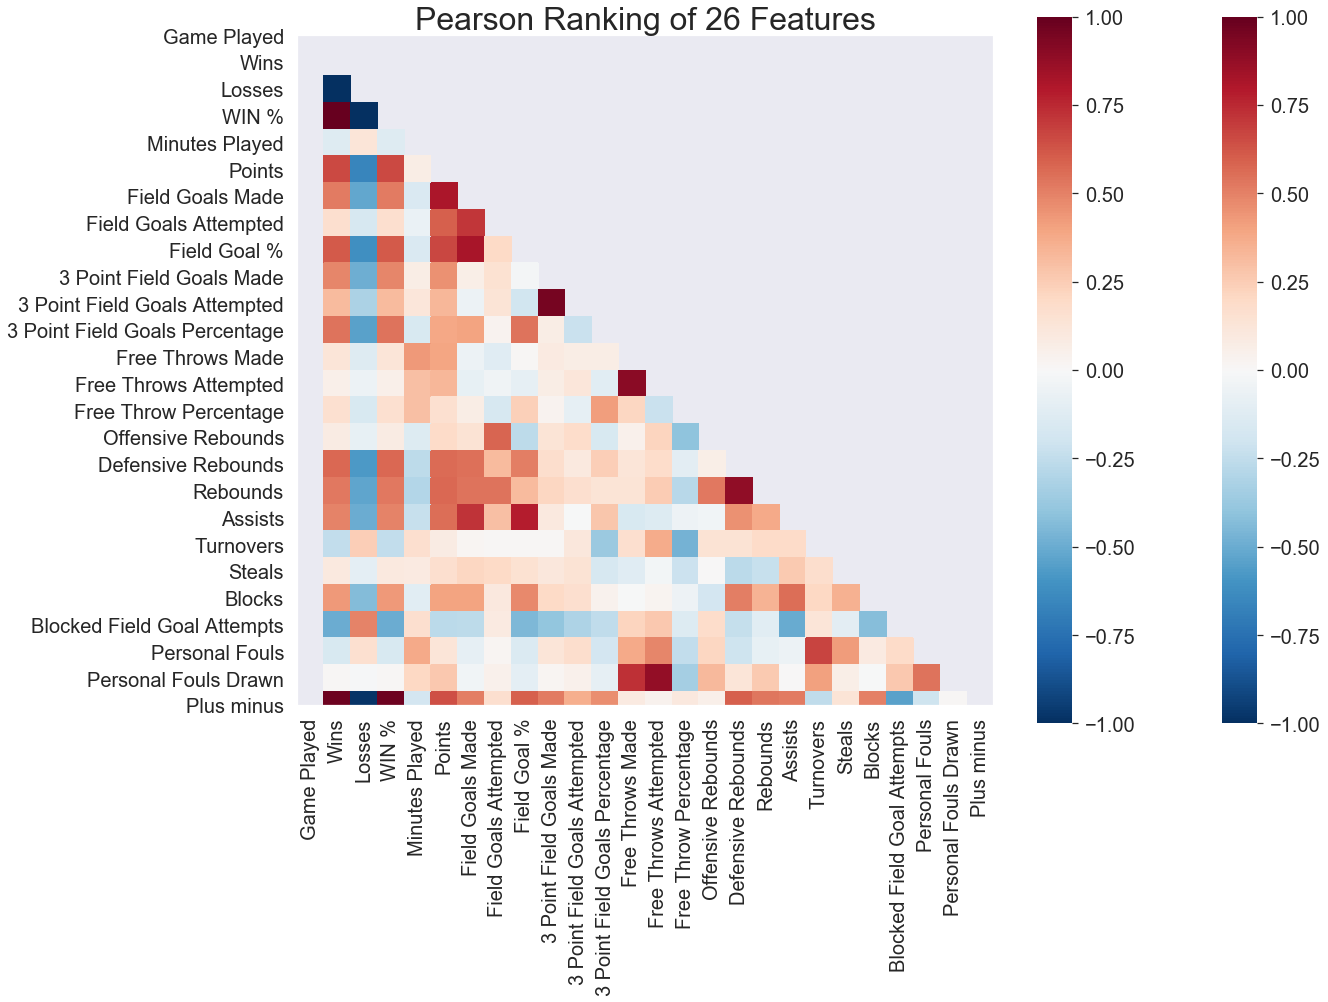

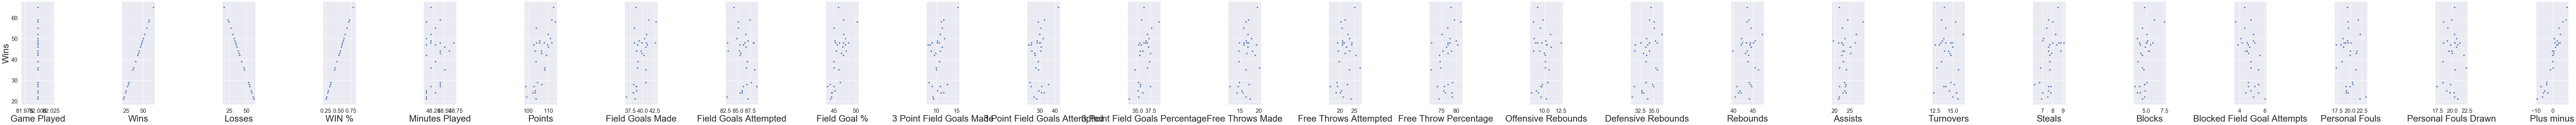

In [259]:
from yellowbrick.features import Rank2D
i=0
def pearsonCor(data):
    global i
    #if (i>=2):
     #   i=0
    visualizer = Rank2D(algorithm="pearson",size=(1080*1.3, 720*1.3))
    visualizer.fit_transform(data)# or df_scaled
    visualizer.show(outpath=str(i)+"data_pearson.png")
    i+=1
    
    
def scatPlot(data):
    # visualize the relationship between the features and the response using scatterplots
    sns.pairplot(data, x_vars=data.columns, y_vars='Wins', size=7, aspect=0.7)

    
pearsonCor(data_train)
pearsonCor(data_test)
scatPlot(data_train)

## Drop Columns & Result Notes
trash=['Losses','WIN %','Game Played','Points']:

### Train data:
##### Testataan vaihtamalla poistettava kenttä:
Personal Fouls Drawn = vaikutus 0,0123->0,0143<br>
3 Point Field Goals Attempted = vaikutus 0,0123->0,0138<br>
3 Point3 Point Field Goals Made = vaikutus 0,0123->0,0140<br>
Plus minus = vaikutus 0,0123->0,0346<br>
Block = vaikutus 0.0123->0,0130<br>

Free Throws Attempted = vaikutus 0,0123->0,0125<br>
##### Rebounds = vaikutus 0.0123->0,01239 --> sama mse kun default<br>
Steals =vaikutus 0.012392->012394<br>
TurnOvers = vaikutus 0.012392 --> 0.01241<br>
##### Offensive Rebounds = 0.012392 --> 0.012392

#### trash=['Losses','WIN %','Game Played','Points','Offensive Rebounds','Rebounds','Steals']:
0.0129

#### trash=['Losses','WIN %','Game Played','Points','Offensive Rebounds','Rebounds','Steals','Blocked Field Goal Attempts']:
0.01293 #Todennäköisesti paras malli todella pienellä hävikillä

In [260]:
def dropColumns(data,listOfValues):
    list=listOfValues
    data=data
    for i in range (len(list)):
        data=data.drop([list[i]],axis=1)
    return data

#trash=['Losses','WIN %','Game Played','Field Goal %',
# 'Rebounds','Free Throw Percentage','3 Point Field Goals Percentage'
#]


#trash=['Losses','WIN %','Game Played','Offensive Rebounds','Rebounds','Steals','Blocked Field Goal Attempts','Points'
#]

trash1=['Losses','WIN %','Game Played','Field Goals Attempted','Field Goals Made','Plus minus','Minutes Played','Rebounds',
       'Free Throws Attempted','Free Throws Made','3 Point Field Goals Attempted', '3 Point Field Goals Made',"Assists",
       'Blocks','Field Goal %','Personal Fouls','Personal Fouls Drawn'
      ]

#PARAS
trash=['Losses','WIN %','Game Played',
 'Rebounds','Free Throw Percentage','3 Point Field Goals Percentage',
'Points','Blocked Field Goal Attempts',
 'Blocks','Minutes Played','Personal Fouls','Field Goal %','Personal Fouls Drawn','Assists',
 'Plus minus','Free Throws Attempted','3 Point Field Goals Attempted'
       #'Field Goals Attempted', 'Free Throws Made', 3 Point3 Point Field Goals Made', 'Offensive Rebounds', 'Defensive Rebounds'
       #'Assists','Turnovers', 'Steals','Field Goals Made', ,'3 Point Field Goals Attempted',
]

trash2=['Losses','WIN %','Game Played','3 Point Field Goals Attempted','Free Throws Attempted','Plus minus',
 'Personal Fouls Drawn','Rebounds','Points','Field Goals Attempted'
]



data_train=dropColumns(data_train,trash)
data_test=dropColumns(data_test,trash)
#print(data_train.describe())


## Split & Standardize Data

In [261]:
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
colnames = data_train.columns.get_values()
colnames = data_train.iloc[:,1:len(colnames)+1].columns.get_values()

#dataT=pd.DataFrame(scaler.fit_transform(data_train))


dataT=pd.DataFrame(scaler.fit_transform(data_train))
X_all=dataT.iloc[:,1:len(colnames)+2]
y_all=dataT.iloc[:,0]

dataTest=pd.DataFrame(scaler.fit_transform(data_test))
X_test=dataTest.iloc[:,1:len(colnames)+2]
y_test=dataTest.iloc[:,0]

colnames
X_all.shape

C:\Users\Yooru\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yooru\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  after removing the cwd from sys.path.


(30, 8)

## Fit & Predict

In [262]:
def LinearReg(x,y,x_test,y_test):

    # build and fit model
    clf = LinearRegression()
    clf.fit(x,y)

    # output model
    print("Coefficients:" ,clf.coef_)
    print("Intercept:", clf.intercept_)

    # compute predicted values
    pred = clf.predict(x_test)

    # compute error statistics
    mse = mean_squared_error(y_test, pred)
    r2s = r2_score(y_test, pred) 
    print("MSE = ", mse)
    print("R2s = ", r2s)
    
    #for i in range(len(pred)):
        #print(pred[i]*stdW+meanW)
    
    dfPred=pd.DataFrame(pred*stdW+meanW)
    dfPred.to_excel(r'PredictionResult.xlsx')
    print(dfPred)
    return clf.coef_
   
    
coef = LinearReg(X_all,y_all,X_test,y_test)
coef = pd.DataFrame(coef.reshape(1,8))

Coefficients: [ 0.68683767 -0.76057953  0.36490676 -0.10086796  0.46002481  0.4759017
 -0.43194525  0.21911009]
Intercept: 1.062353310106944e-15
MSE =  0.1366992217649597
R2s =  0.8633007782350404
            0
0   63.435856
1   51.187430
2   60.670179
3   53.733754
4   49.089218
5   50.371651
6   48.394883
7   50.898814
8   52.033027
9   48.477870
10  43.597639
11  36.669171
12  47.877393
13  35.863649
14  41.333572
15  37.182123
16  37.855251
17  43.143515
18  43.272580
19  36.270200
20  37.996073
21  37.869519
22  30.133473
23  42.109468
24  32.923061
25  28.802657
26  22.511877
27  26.738050
28  16.633381
29  22.924668


## Graph
Values close to zero affect less on MSE

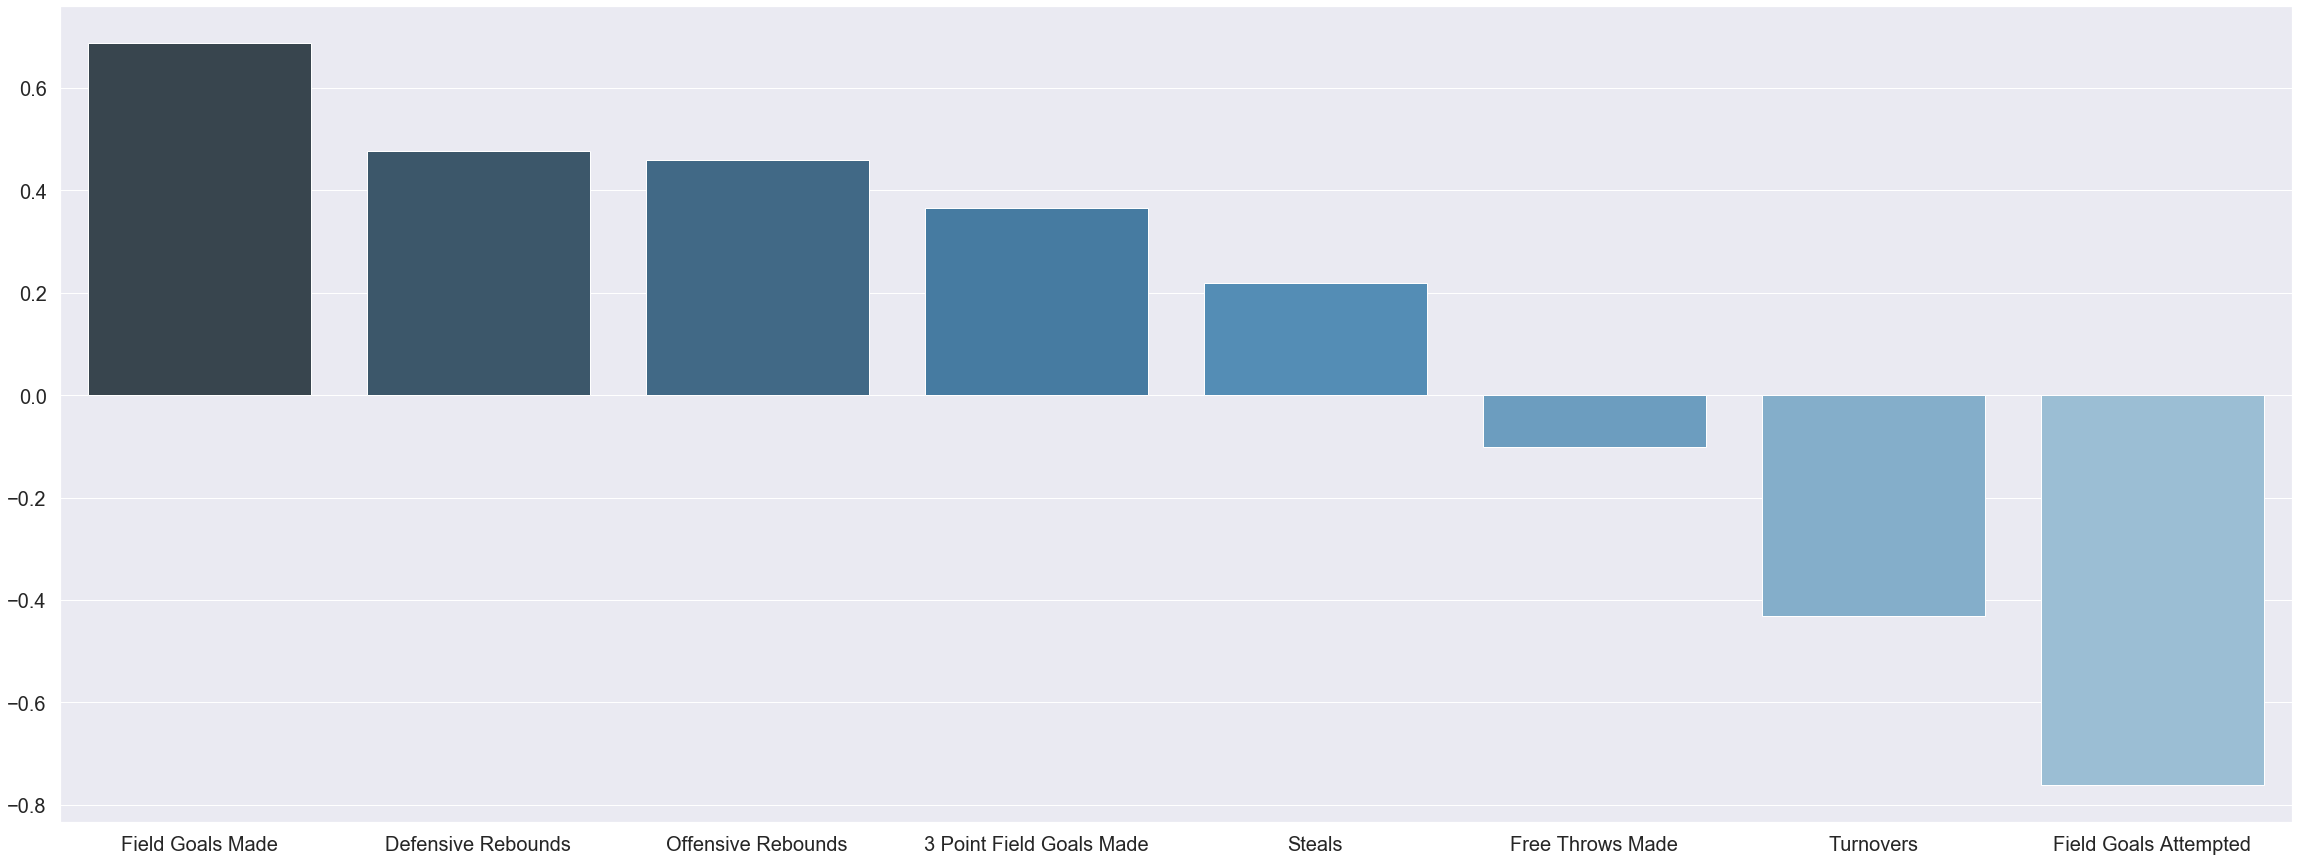

In [263]:
import matplotlib.pyplot as plt

rc={'font.size': 32, 'axes.labelsize': 32, 'legend.fontsize': 32.0, 
    'axes.titlesize': 32, 'xtick.labelsize': 20, 'ytick.labelsize': 20}
sns.set(rc=rc)
coef.columns=colnames

coef = coef
coef=coef.sort_values(by=0, ascending=False, axis=1)
plt.figure(figsize=(40, 15))


ax = sns.barplot(data=coef,palette="Blues_d")

plt.savefig("BasketBall.png")